In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
from collections import Counter
from sklearn import preprocessing
import scipy
import statsmodels.api as sm
from statsmodels.formula.api import ols
sns.set_context("talk")

In [ ]:
ls data

In [3]:
path = 'data/crime_texans_finalB.csv'
df = pd.read_csv(path)
#df.drop(['date','dist_stadium_meadian','premise_mode'],axis=1,inplace=True)
df.drop(['date'],axis=1,inplace=True)

nogame = df.game =='No Game'
df = df[~nogame]
df.head()

,crime_total,weekday,month,year,dist_stadium_meadian,season,part_day_mode,hour_mode,premise_mode,offense_mode,game
2,4,Sunday,Jan,2010,0.714016,Winter,Night,0,apartment prk,Auto Theft,Won Game
244,7,Sunday,Sep,2010,0.419502,Autumn,Morning,6,hotel prk,Theft,Won Game
257,18,Sunday,Sep,2010,0.405534,Autumn,Afternoon,0,prk,Theft,Lost Game
271,7,Sunday,Oct,2010,0.577510,Autumn,Evening,20,apartment,Theft,Lost Game
278,9,Sunday,Oct,2010,0.477608,Autumn,Afternoon,13,apartment prk,Theft,Won Game


In [ ]:
#df.drop(['month','offense_mode'],axis=1,inplace=True) # 27
df.drop(['month','offense_mode','premise_mode'],axis=1,inplace=True) # 19
#df.drop(['month','offense_mode','season'],axis=1,inplace=True) # 26
#df.drop(['offense_mode','season',],axis=1,inplace=True) # 32
#df.drop(['offense_mode','dist_stadium_meadian'],axis=1,inplace=True) # 32
# df.drop(['date','weekday','dist_stadium_meadian'],axis=1,inplace=True) # 25
# df.drop(['date','weekday','dist_stadium_meadian','premise_mode'],axis=1,inplace=True) # 19
# df.drop(['date','offense_mode','dist_stadium_meadian','premise_mode'],axis=1,inplace=True) # 25
#df.drop(['date','offense_mode','premise_mode','season','dist_stadium_meadian'],axis=1,inplace=True) # 25

#df.drop(['offense_mode','season','premise_mode'],axis=1,inplace=True) # 32
#df.drop(['premise_mode','offense_mode'],axis=1,inplace=True)
#df.drop(['weekday','dist_stadium_meadian','premise_mode'],axis=1,inplace=True) # 19
df.head()

In [ ]:
# df = df[['crime_total','season','weekday','offense_mode','part_day_mode','premise_mode']]  #208

#df = df[['crime_total','weekday','offense_mode','part_day_mode','premise_mode']]  #207
#df = df[['crime_total','offense_mode','part_day_mode','premise_mode']]  #17

#df = df[['game','crime_total','weekday','offense_mode','part_day_mode','premise_mode']]  #21


In [ ]:
df.game.unique()

In [5]:
### get dummies
dfd = pd.get_dummies(df,drop_first=True)
dfd.columns = [c.replace("'", '') for c in dfd.columns]
dfd.columns = [c.replace(".", '') for c in dfd.columns]
dfd.columns = [c.replace("&", 'n') for c in dfd.columns]
dfd.columns = [c.replace(' ', '_') for c in dfd.columns]
dfd.head()

,crime_total,year,dist_stadium_meadian,hour_mode,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Tuesday,month_Jan,month_Nov,...,premise_mode_stadium,premise_mode_store,premise_mode_store_prk,premise_mode_street,premise_mode_unk,offense_mode_Auto_Theft,offense_mode_Burglary,offense_mode_Robbery,offense_mode_Theft,game_Won_Game
2,4,2010,0.714016,0,0,0,1,0,1,0,...,0,0,0,0,0,1,0,0,0,1
244,7,2010,0.419502,6,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1
257,18,2010,0.405534,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
271,7,2010,0.577510,20,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
278,9,2010,0.477608,13,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [ ]:
#dfd.drop(['game_Won_Game'],axis=1,inplace=True)

In [6]:
X = dfd.drop(['crime_total'],axis=1)  # predictors

#X = dfd[['dist_stadium_meadian']]
cols = X.columns
formula = '+'.join(list(cols))

y = dfd.crime_total

form = 'crime_total ~'+ formula
#form = 'crime_total ~ hour_mode + year'
m = ols(form,dfd).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:            crime_total   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     1.367
Date:                Tue, 17 Jul 2018   Prob (F-statistic):              0.182
Time:                        15:37:49   Log-Likelihood:                -211.06
No. Observations:                  68   AIC:                             486.1
Df Residuals:                      36   BIC:                             557.1
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [ ]:
df.head()

## EDA & Summary Statistics

In [ ]:
fig,ax = plt.subplots(figsize=(10,5))

sns.distplot(m.fittedvalues)
plt.show()

In [ ]:
fig,ax = plt.subplots(figsize=(10,5))

sns.distplot(dfd['crime_total'])
plt.show()

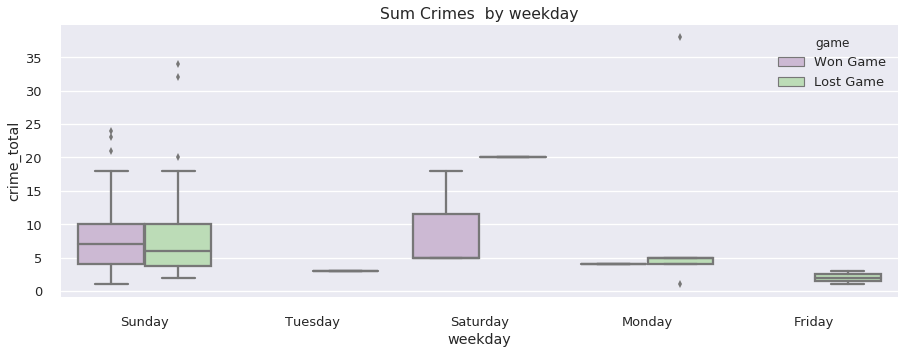

In [15]:
fig,ax = plt.subplots(figsize=(15,5))

sns.boxplot(x="weekday", y="crime_total", hue="game", data=df, palette="PRGn")
sns.despine(offset=10, trim=True)
plt.title('Sum Crimes  by weekday')
plt.show()

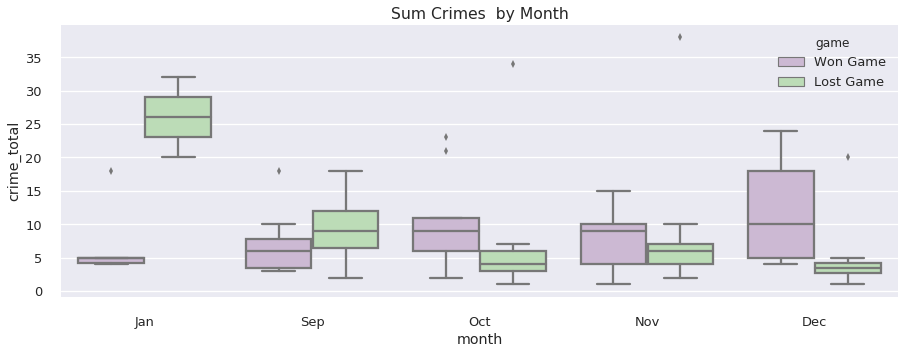

In [16]:
fig,ax = plt.subplots(figsize=(15,5))

sns.boxplot(x="month", y="crime_total", hue="game", data=df, palette="PRGn")
sns.despine(offset=10, trim=True)
plt.title('Sum Crimes  by Month')
plt.show()

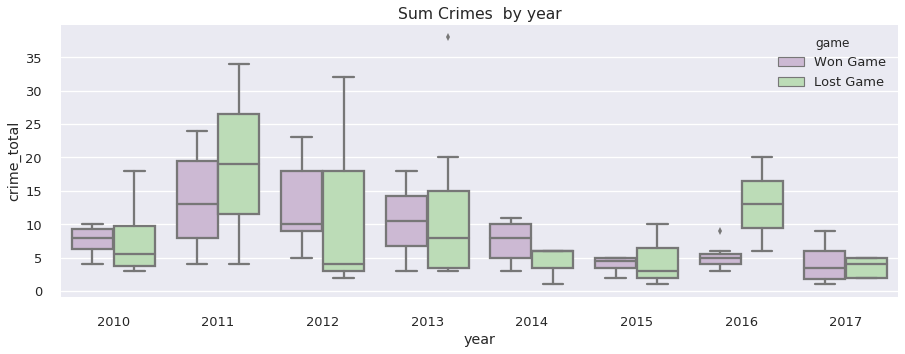

In [17]:
fig,ax = plt.subplots(figsize=(15,5))

sns.boxplot(x="year", y="crime_total", hue="game", data=df, palette="PRGn")
sns.despine(offset=10, trim=True)
plt.title('Sum Crimes  by year')
plt.show()

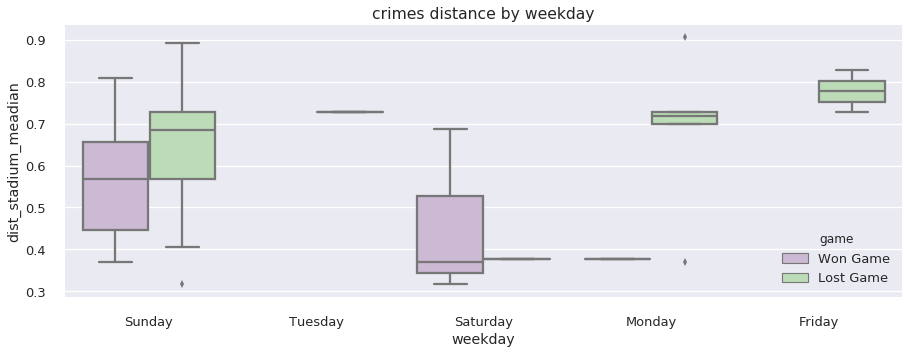

In [18]:
fig,ax = plt.subplots(figsize=(15,5))

sns.boxplot(x="weekday", y="dist_stadium_meadian", hue="game", data=df, palette="PRGn")
sns.despine(offset=10, trim=True)
plt.title('crimes distance by weekday')
plt.show()

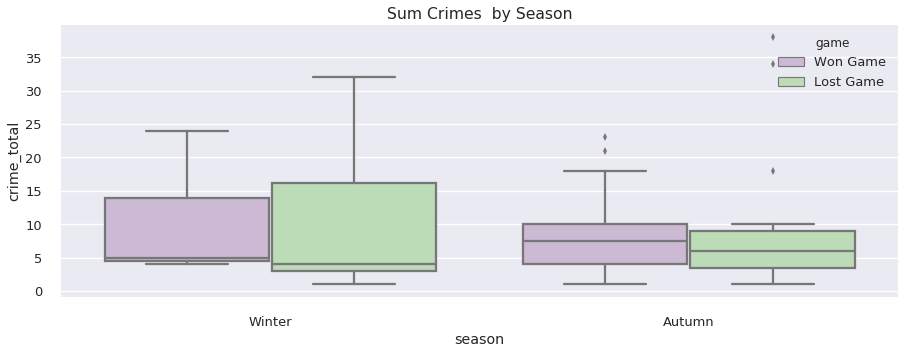

In [19]:
fig,ax = plt.subplots(figsize=(15,5))

sns.boxplot(x="season", y="crime_total", hue="game", data=df, palette="PRGn")
sns.despine(offset=10, trim=True)
plt.title('Sum Crimes  by Season')
plt.show()

## Relationships

## linear regression

In [ ]:
### get dummies

dfd = pd.get_dummies(df,drop_first=True)
dfd.columns = [c.replace(' ', '_') for c in dfd.columns]
dfd.head()

In [ ]:
X = dfd.drop(['crime_total'],axis=1)  # predictors

#X = dfd[['dist_stadium_meadian']]
cols = X.columns
formula = '+'.join(list(cols))

y = dfd.crime_total





form = 'crime_total ~'+ formula

m = ols(form,dfd).fit()
print(m.summary())

In [ ]:
pvals = pd.DataFrame(m.pvalues>0.05)
terdx = pvals.index == 'Intercept'
pvals = pvals[~terdx]
pospval = pvals[pvals[0] == True] 
f_col1 = list(pospval.index)

In [ ]:
#X = dfd.drop(['crime_total'],axis=1)  # predictors

X = dfd[f_col1]

cols = X.columns
formula = '+'.join(list(cols))

y = dfd.crime_total




form = 'crime_total ~'+ formula

m = ols(form,dfd).fit()
print(m.summary())

In [ ]:
pvals = pd.DataFrame(m.pvalues<=0.05)
terdx = pvals.index == 'Intercept'
pvals = pvals[~terdx]
pospval = pvals[pvals[0] == True]  

f_col2 = list(pospval.index)

#X = dfd.drop(['crime_total'],axis=1)  # predictors

X = dfd[f_col2]

cols = X.columns
formula = '+'.join(list(cols))

y = dfd.crime_total

form = 'crime_total ~'+ formula

m = ols(form,dfd).fit()
print(m.summary())

In [ ]:
pvals = pd.DataFrame(m.pvalues<=0.05)
terdx = pvals.index == 'Intercept'
pvals = pvals[~terdx]
pospval = pvals[pvals[0] == True]  

f_col2 = list(pospval.index)

#X = dfd.drop(['crime_total'],axis=1)  # predictors

X = dfd[f_col2]

cols = X.columns
formula = '+'.join(list(cols))

y = dfd.crime_total

form = 'crime_total ~'+ formula

m = ols(form,dfd).fit()
print(m.summary())

In [ ]:
pvals = pd.DataFrame(m.pvalues<=0.05)
terdx = pvals.index == 'Intercept'
pvals = pvals[~terdx]
pospval = pvals[pvals[0] == True]  

f_col2 = list(pospval.index)

#X = dfd.drop(['crime_total'],axis=1)  # predictors

X = dfd[f_col2]

cols = X.columns
formula = '+'.join(list(cols))

y = dfd.crime_total

form = 'crime_total ~'+ formula

m = ols(form,dfd).fit()
print(m.summary())

In [ ]:
pvals = pd.DataFrame(m.pvalues<=0.05)
terdx = pvals.index == 'Intercept'
pvals = pvals[~terdx]
pospval = pvals[pvals[0] == True]  

f_col2 = list(pospval.index)

#X = dfd.drop(['crime_total'],axis=1)  # predictors

X = dfd[f_col2]

cols = X.columns
formula = '+'.join(list(cols))

y = dfd.crime_total

form = 'crime_total ~'+ formula

m = ols(form,dfd).fit()
print(m.summary())

In [7]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [8]:
def fit_model(alg,X,y):
    '''
    model fit
    '''
    alg.fit(X,y)
    prediction = alg.predict(X)
    RSS = np.sum((y - prediction) ** 2)
    ESS = np.sum(prediction - np.mean(y)) ** 2
    R_sq = alg.score(X, y)
    print('Residual Sum-of-Squares RSS       : {}'.format(RSS))
    print('Explained Sum-of-Squares ESS      : {}'.format(ESS))
    print('Coefficient of Determination R-sq : {}'.format(R_sq))

In [9]:
alg1 = LinearRegression(normalize=True)
alg2 = Ridge(alpha=0.05,normalize=True)
alg3 = DecisionTreeRegressor(max_depth=5, min_samples_leaf=100)
alg5 = RandomForestRegressor(n_estimators=50,max_depth=5, min_samples_leaf=100,n_jobs=4)
alg6 = RandomForestRegressor(n_estimators=100,max_depth=6, min_samples_leaf=100,n_jobs=4)

In [10]:
fit_model(alg1,X,y)

Residual Sum-of-Squares RSS       : 1976.8549275958928
Explained Sum-of-Squares ESS      : 6.793543898018518e-23
Coefficient of Determination R-sq : 0.5407186660316763


In [11]:
fit_model(alg2,X,y)

Residual Sum-of-Squares RSS       : 2037.3081445552284
Explained Sum-of-Squares ESS      : 5.888815103038644e-23
Coefficient of Determination R-sq : 0.5266736120723927


In [12]:
fit_model(alg3,X,y)

Residual Sum-of-Squares RSS       : 4304.235294117647
Explained Sum-of-Squares ESS      : 0.0
Coefficient of Determination R-sq : 0.0


In [13]:
fit_model(alg5,X,y)

Residual Sum-of-Squares RSS       : 4304.815270588235
Explained Sum-of-Squares ESS      : 39.438399999996534
Coefficient of Determination R-sq : -0.00013474553107739595


In [14]:
fit_model(alg6,X,y)

Residual Sum-of-Squares RSS       : 4305.389700000001
Explained Sum-of-Squares ESS      : 78.49959999999848
Coefficient of Determination R-sq : -0.00026820231782664905


In [ ]:
rom sklearn import cross_validation, metrics
from sklearn.model_selection import train_test_split


def modelfit(alg, df):
    '''
    target = y
    predictors = X
    '''
    X = df.drop('crime_total', axis=1).values
    y = df['crime_total'].values

    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

    
    
    #Fit the algorithm on the data
    alg.fit(X_train,y_train)
        
    #Predict training set:
    train_predictions = alg.predict(X_train)

    #Perform cross-validation:
    cv_score = cross_validation.cross_val_score(alg, X_train, y_train, cv=20, scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    #Print model report:
    print ("\nModel Report")
    print( "RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(y_train, train_predictions)))
    
    print ("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score))
)
    #Predict on testing data:
    y_test = alg.predict(X_test)

    #Export submission file:
#     IDcol.append(target)
#     submission = pd.DataFrame({ x: dtest[x] for x in IDcol})
#     submission.to_csv(filename, index=False)